## Prediction model for month 3 user retention

### Importing libraries and dataset

In [40]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score, classification_report


import warnings
warnings.filterwarnings("ignore")

In [41]:
pd.set_option('display.max_columns', None)

In [42]:
df = pd.read_csv('dataset.csv') #This dataset is the merged dataset I created from the 3 csv files of case study.

In [43]:
df.head()

,Unnamed: 0,user_id,first_use_ts,is_registered_user,user_primary_type,country_cd,region,city,attributed_channel,usage_date,total_mins,activity,content_type,domain_title,course_title,unit_title,locale,client,device_type,os,is_detected_weekday_7am_3pm,start_time_first_ts,end_time_last_ts,m3_retained
0,0,kaid_1172977777831184091024959,2021-01-18 03:10:00,False,Unregistered Learner,IN,GA,Navelim,organic search,2021-01-18 00:00:00,10.047566,READING,ARTICLE,Science,AP®︎ Biology,Gene expression and regulation,en,web,Desktop Web (Non-Chromebook),Windows,True,2021-01-18 03:10:24,2021-01-18 03:20:27,0
1,1,kaid_1167642368311104946092969,2021-01-04 06:13:35,False,Unregistered Learner,IN,GA,Alto-Porvorim,intra_ka,2021-01-04 00:00:00,0.000017,READING,ARTICLE,Unknown,Unknown,Unknown,en,web,Desktop Web (Non-Chromebook),Mac OS X,False,2021-01-04 11:31:30,2021-01-04 11:31:30,0
2,2,kaid_1167642368311104946092969,2021-01-04 06:13:35,False,Unregistered Learner,IN,GA,Alto-Porvorim,intra_ka,2021-01-04 00:00:00,0.002133,WATCHING,VIDEO,Unknown,Unknown,Unknown,en,web,Desktop Web (Non-Chromebook),Mac OS X,False,2021-01-04 11:11:14,2021-01-04 11:24:49,0
3,3,kaid_1167642368311104946092969,2021-01-04 06:13:35,False,Unregistered Learner,IN,GA,Alto-Porvorim,intra_ka,2021-01-04 00:00:00,0.003450,WATCHING,VIDEO,Unknown,Unknown,Unknown,en,web,Desktop Web (Non-Chromebook),Mac OS X,True,2021-01-04 06:14:36,2021-01-04 07:33:23,0
4,4,kaid_1167642368311104946092969,2021-01-04 06:13:35,False,Unregistered Learner,IN,GA,Alto-Porvorim,intra_ka,2021-01-04 00:00:00,0.715933,WATCHING,VIDEO,Arts and humanities,Big History Project,1. What Is Big History?,en,web,Desktop Web (Non-Chromebook),Mac OS X,True,2021-01-04 07:31:42,2021-01-04 07:33:10,0


In [44]:
# Taking columns which impacts month 3 user retention

# relevant_cols = ['is_registered_user', 'attributed_channel', 'domain_title', 'region', 'm3_retained']
relevant_cols = ['is_registered_user', 'attributed_channel', 'm3_retained'] 

In [45]:
df_new = df[relevant_cols]

In [46]:
#dropping those values which occurs less frequently to refine the train and test data
def drop_less_frequent_values(df, categorical_cols):
    for col in categorical_cols:
        percentage_counts = df[col].value_counts(normalize=True) * 100

        # Identify values to relabel as 'Other'
        values_to_relabel = percentage_counts[percentage_counts < 1].index

        # Replace these values with 'Other'
        df[col] = df[col].apply(lambda x: x if x not in values_to_relabel else 'Other')
    return df

In [47]:
df_final = drop_less_frequent_values(df_new, relevant_cols)

In [48]:
X = df_final.drop('m3_retained', axis=1) #independent columns
y = df_final['m3_retained'] #tareget column

In [49]:
# One-hot encode the categorical columns
X = pd.get_dummies(X, drop_first=True)

In [50]:
X.head()

,is_registered_user,attributed_channel_direct,attributed_channel_intra_ka,attributed_channel_organic search,attributed_channel_other KA marketing,attributed_channel_website referral,attributed_channel_youtube
0,False,False,False,True,False,False,False
1,False,False,True,False,False,False,False
2,False,False,True,False,False,False,False
3,False,False,True,False,False,False,False
4,False,False,True,False,False,False,False


### finding correlation between the columns

In [51]:
import scipy.stats
correlations = {}

# Iterate through each pair of binary columns
for col1 in X.columns:
    for col2 in X.columns:
        if col1 != col2:
            corr, _ = scipy.stats.pointbiserialr(X[col1], X[col2])
            correlations[(col1, col2)] = corr

# Print the correlations
l = []
for (col1, col2), corr in correlations.items():
    l.append([col1, col2, abs(corr)])
    
corr_df = pd.DataFrame(l, columns=['Col1', 'Col2', 'Corr'])
corr_df.sort_values(by='Corr', ascending = False, inplace = True)

In [52]:
corr_df

,Col1,Col2,Corr
8,attributed_channel_direct,attributed_channel_organic search,0.563643
19,attributed_channel_organic search,attributed_channel_direct,0.563643
20,attributed_channel_organic search,attributed_channel_intra_ka,0.399952
14,attributed_channel_intra_ka,attributed_channel_organic search,0.399952
21,attributed_channel_organic search,attributed_channel_other KA marketing,0.255157
27,attributed_channel_other KA marketing,attributed_channel_organic search,0.255157
18,attributed_channel_organic search,is_registered_user,0.248855
2,is_registered_user,attributed_channel_organic search,0.248855
7,attributed_channel_direct,attributed_channel_intra_ka,0.235566
13,attributed_channel_intra_ka,attributed_channel_direct,0.235566


### Creating train and test data

In [53]:
#taking 20% data as test data, rest 80% data is train data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42) 

In [54]:
model = LogisticRegression() #defining logistic regression model

In [55]:
clf = GradientBoostingClassifier(n_estimators=100, learning_rate=1.0, max_depth=1, random_state=0) #defining GradientBoostingClassifier 

In [56]:
#applying 'fit' method to both the models to train them with training data
model.fit(X_train, y_train)
clf.fit(X_train, y_train)

GradientBoostingClassifier(learning_rate=1.0, max_depth=1, random_state=0)

### Results

In [57]:

y_pred = clf.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

report = classification_report(y_test, y_pred)
print('Classification Report:\n', report)

Accuracy: 0.83
Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.99      0.90      2653
           1       0.83      0.12      0.21       622

    accuracy                           0.83      3275
   macro avg       0.83      0.56      0.56      3275
weighted avg       0.83      0.83      0.77      3275



### Confusion matrix

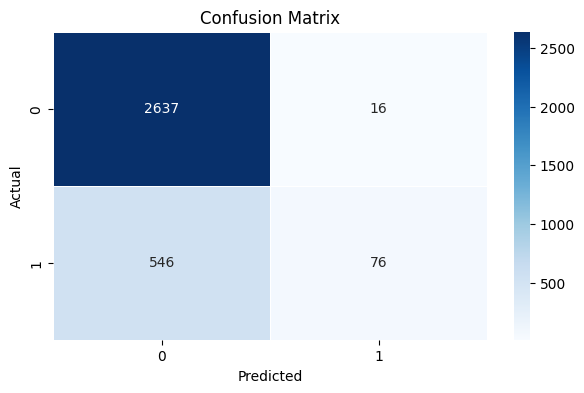

In [58]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Calculate the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix using seaborn
plt.figure(figsize=(7, 4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', linewidths=.5)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()